# Sentiment Analysis using Naive Bayes (IMDb Dataset)

## Step 1: Import Libraries


In [16]:
import tensorflow_datasets as tfds
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Step 2: Load Dataset


In [17]:
nltk.download('stopwords')
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = data['train'], data['test']

X_train, y_train = [], []
for text, label in tfds.as_numpy(train_data):
    X_train.append(text.decode("utf-8"))
    y_train.append(label)

X_test, y_test = [], []
for text, label in tfds.as_numpy(test_data):
    X_test.append(text.decode("utf-8"))
    y_test.append(label)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 3: Clean Text


In [18]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

X_train_clean = [clean_text(text) for text in X_train]
X_test_clean = [clean_text(text) for text in X_test]

## Step 4: Vectorization


In [19]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test_clean)

## Step 5: Model Training


In [20]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

## Step 6: Evaluation

Accuracy: 0.8504
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     12500
    Positive       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



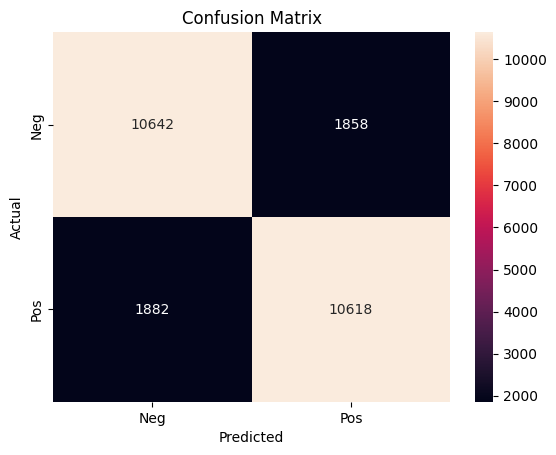

In [21]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 7: Explainability

In [22]:
feature_names = vectorizer.get_feature_names_out()
log_probs = model.feature_log_prob_

for i, label in enumerate(['Negative', 'Positive']):
    top_words = np.argsort(log_probs[i])[-10:]
    print(f"\nTop words for {label}:")
    print([feature_names[j] for j in top_words])


Top words for Negative:
['dont', 'really', 'would', 'good', 'even', 'bad', 'like', 'one', 'film', 'movie']

Top words for Positive:
['time', 'well', 'see', 'story', 'like', 'good', 'great', 'one', 'movie', 'film']


## Step 8: Save Model & Vectorizer

In [23]:
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)